In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df=pd.read_csv('/content/data.csv')

In [ ]:
df

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,no,no,no,yes,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,no,no,no,yes,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,no,no,no,yes,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,no,no,yes,yes,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,no,no,no,yes,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,no,yes,no,no,,William W. Wang,https://www.vizio.com,VZIO,1705.1
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,no,no,no,yes,,Christopher G. McCann,https://www.1800flowers.com,FLWS,830
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,no,no,no,yes,,Jeffrey Solomon,https://www.cowen.com,COWN,1078
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,no,no,no,yes,,Guillermo Novo,https://www.ashland.com,ASH,5601.9


In [ ]:
df.columns

Index(['company', 'rank', 'rank_change', 'revenue', 'profit',
       'num. of employees', 'sector', 'city', 'state', 'newcomer',
       'ceo_founder', 'ceo_woman', 'profitable', 'prev_rank', 'CEO', 'Website',
       'Ticker', 'Market Cap'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   object 
 10  ceo_founder        1000 non-null   object 
 11  ceo_woman          1000 non-null   object 
 12  profitable         1000 non-null   object 
 13  prev_rank          1000 non-null   object 
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

There are columns with object data types that would be more useful as integers or floats for analysis. Therefore, encoding these categorical variables into numerical formats will enhance the efficiency of data visualisation.

In [ ]:
df[['profitable', 'ceo_founder', 'ceo_woman','newcomer']] = df[['profitable', 'ceo_founder', 'ceo_woman','newcomer']].replace({'yes': 1, 'no': 0})

<ipython-input-6-de17d8a58c92>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['profitable', 'ceo_founder', 'ceo_woman','newcomer']] = df[['profitable', 'ceo_founder', 'ceo_woman','newcomer']].replace({'yes': 1, 'no': 0})


In [ ]:
df['sector_code'], _ = pd.factorize(df['sector'])
df['state_code'], _ = pd.factorize(df['state'])

In [ ]:
df['Market Cap'] = pd.to_numeric(df['Market Cap'], errors='coerce')
df['prev_rank'] = pd.to_numeric(df['prev_rank'], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1000 non-null   object 
 1   rank               1000 non-null   int64  
 2   rank_change        1000 non-null   float64
 3   revenue            1000 non-null   float64
 4   profit             997 non-null    float64
 5   num. of employees  999 non-null    float64
 6   sector             1000 non-null   object 
 7   city               1000 non-null   object 
 8   state              1000 non-null   object 
 9   newcomer           1000 non-null   int64  
 10  ceo_founder        1000 non-null   int64  
 11  ceo_woman          1000 non-null   int64  
 12  profitable         1000 non-null   int64  
 13  prev_rank          469 non-null    float64
 14  CEO                1000 non-null   object 
 15  Website            1000 non-null   object 
 16  Ticker             951 no

In [ ]:
df

,company,rank,rank_change,revenue,profit,num. of employees,sector,city,state,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,CEO,Website,Ticker,Market Cap,sector_code,state_code
0,Walmart,1,0.0,572754.0,13673.0,2300000.0,Retailing,Bentonville,AR,0,0,0,1,1.0,C. Douglas McMillon,https://www.stock.walmart.com,WMT,352037.0,0,0
1,Amazon,2,0.0,469822.0,33364.0,1608000.0,Retailing,Seattle,WA,0,0,0,1,2.0,Andrew R. Jassy,www.amazon.com,AMZN,1202717.0,0,1
2,Apple,3,0.0,365817.0,94680.0,154000.0,Technology,Cupertino,CA,0,0,0,1,3.0,Timothy D. Cook,www.apple.com,AAPL,2443962.0,1,2
3,CVS Health,4,0.0,292111.0,7910.0,258000.0,Health Care,Woonsocket,RI,0,0,1,1,4.0,Karen Lynch,https://www.cvshealth.com,CVS,125204.0,2,3
4,UnitedHealth Group,5,0.0,287597.0,17285.0,350000.0,Health Care,Minnetonka,MN,0,0,0,1,5.0,Andrew P. Witty,www.unitedhealthgroup.com,UNH,500468.0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Vizio Holding,996,0.0,2124.0,-39.4,800.0,Industrials,Irvine,CA,0,1,0,0,NaN,William W. Wang,https://www.vizio.com,VZIO,1705.1,11,2
996,1-800-Flowers.com,997,0.0,2122.2,118.7,4800.0,Retailing,Jericho,NY,0,0,0,1,NaN,Christopher G. McCann,https://www.1800flowers.com,FLWS,830.0,0,14
997,Cowen,998,0.0,2112.8,295.6,1534.0,Financials,New York,NY,0,0,0,1,NaN,Jeffrey Solomon,https://www.cowen.com,COWN,1078.0,4,14
998,Ashland,999,0.0,2111.0,220.0,4100.0,Chemicals,Wilmington,DE,0,0,0,1,NaN,Guillermo Novo,https://www.ashland.com,ASH,5601.9,14,31


Now, we can extract the numerical values from the df and do the correlation matrix.

In [ ]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

In [ ]:
correlation_matrix = numeric_df.corr()

In [ ]:
correlation_matrix

,rank,rank_change,revenue,profit,num. of employees,newcomer,ceo_founder,ceo_woman,profitable,prev_rank,Market Cap,sector_code,state_code
rank,1.000000,-0.048507,-0.502607,-0.368538,-0.322174,-0.049689,0.037413,-0.011379,-0.144396,0.944723,-0.317680,0.116757,0.114655
rank_change,-0.048507,1.000000,0.031845,0.019077,-0.028286,0.003876,0.114776,-0.015822,0.030031,0.129157,0.022477,-0.020346,-0.066223
revenue,-0.502607,0.031845,1.000000,0.651387,0.732214,-0.039841,-0.022809,0.029775,0.075607,-0.580324,0.622696,-0.155388,-0.140471
profit,-0.368538,0.019077,0.651387,1.000000,0.337510,-0.021074,0.006499,-0.010260,0.143470,-0.406788,0.832369,-0.129058,-0.107464
num. of employees,-0.322174,-0.028286,0.732214,0.337510,1.000000,-0.033565,-0.007805,0.018165,0.052065,-0.351148,0.361707,-0.068431,-0.080361
newcomer,-0.049689,0.003876,-0.039841,-0.021074,-0.033565,1.000000,0.084647,-0.031660,-0.027175,NaN,-0.031009,-0.045342,0.013602
ceo_founder,0.037413,0.114776,-0.022809,0.006499,-0.007805,0.084647,1.000000,-0.073276,-0.100783,-0.019918,0.035841,-0.092348,-0.095735
ceo_woman,-0.011379,-0.015822,0.029775,-0.010260,0.018165,-0.031660,-0.073276,1.000000,0.019295,-0.007070,-0.030026,-0.062047,-0.032763
profitable,-0.144396,0.030031,0.075607,0.143470,0.052065,-0.027175,-0.100783,0.019295,1.000000,-0.066641,0.075191,0.043946,0.005710
prev_rank,0.944723,0.129157,-0.580324,-0.406788,-0.351148,NaN,-0.019918,-0.007070,-0.066641,1.000000,-0.343096,0.153280,0.084774


Text(0.5, 1.0, 'Correlation Heatmap')

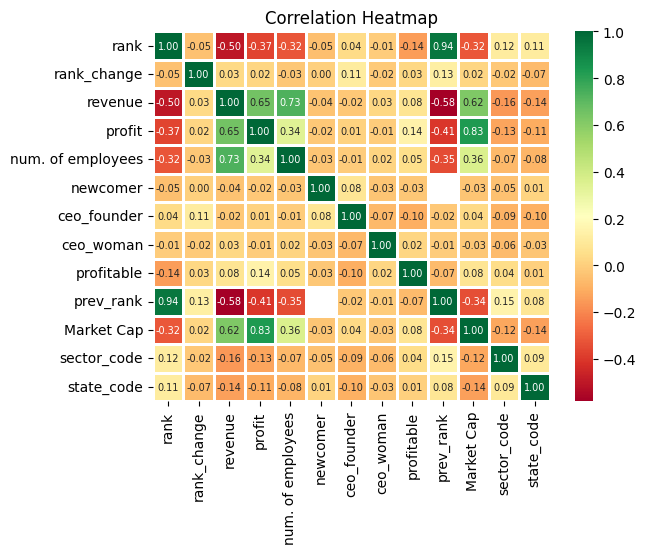

In [ ]:
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    linewidths=1,
    cbar=True,
    annot_kws={"size": 7},
)
plt.title('Correlation Heatmap')


Besides the expected correlations like profit, revenue and prev_rank with the rank or market_cap and revenue that have a higher number, but were rather intuitive, there are correlations with smaller numbers, but that will provide intresting insights.

The first relationship that needs inspection is between Profitability and Sector.

In [ ]:
df['sector'].value_counts()

,count
sector,
Financials,166
Technology,121
Energy,100
Retailing,77
Health Care,77
Business Services,52
Industrials,50
Materials,46
Transportation,35


In [ ]:
sector_mean_profit = df.groupby('sector')['profit'].mean().reset_index()

In [ ]:
sector_mean_profit = sector_mean_profit.sort_values(by='profit', ascending=False)

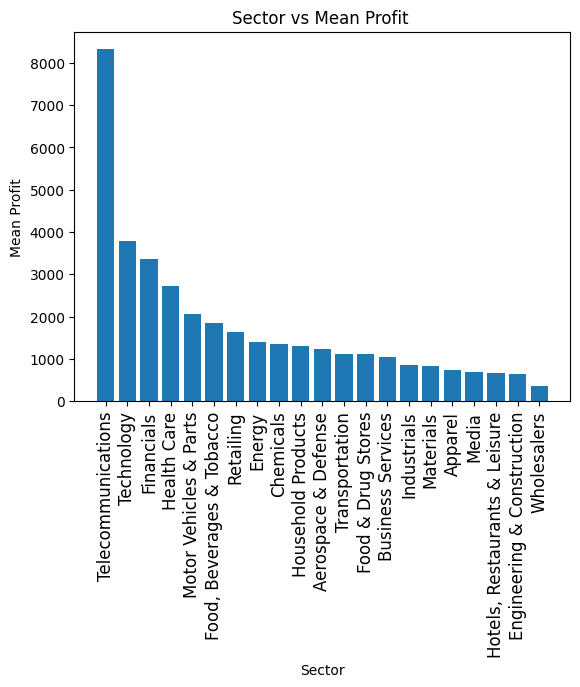

In [ ]:
plt.title('Sector vs Mean Profit ')
plt.xlabel('Sector')
plt.ylabel('Mean Profit')
plt.bar(sector_mean_profit['sector'], sector_mean_profit['profit']);
plt.xticks(rotation=90, fontsize=12);

In [ ]:
sector_median_profit = df.groupby('sector')['profit'].median().reset_index()

In [ ]:
sector_median_profit = sector_median_profit.sort_values(by='profit', ascending=False)

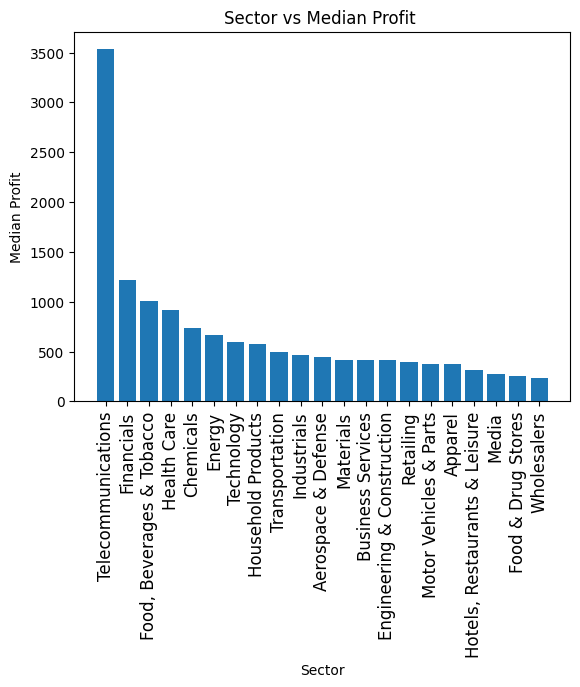

In [ ]:
plt.title('Sector vs Median Profit ');
plt.xlabel('Sector');
plt.ylabel('Median Profit');
plt.bar(sector_median_profit['sector'], sector_median_profit['profit']);
plt.xticks(rotation=90, fontsize=12);

Although there are only 9 companies in the Telecommunication sector, their mean and median profit is the highest of them all. On the other hand, the profit for the Wholesale sector is the lowest.

Let's investigate further. Let's see what is the percentage of profitable companies in each sector.

In [ ]:
sector_profitability = df.groupby('sector').apply(
    lambda x: (x['profitable'] == 1).sum() / len(x) * 100
).reset_index(name='profitability_percentage')

<ipython-input-22-a13cbb73174e>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sector_profitability = df.groupby('sector').apply(


In [ ]:
sector_profitability_sorted = sector_profitability.sort_values(by='profitability_percentage', ascending=True)

In [ ]:
sector_profitability_sorted

,sector,profitability_percentage
14,Media,75.000000
4,Energy,77.000000
17,Technology,81.818182
10,"Hotels, Restaurants & Leisure",82.142857
19,Transportation,82.857143
2,Business Services,84.615385
13,Materials,84.782609
0,Aerospace & Defense,88.235294
16,Retailing,88.311688
18,Telecommunications,88.888889


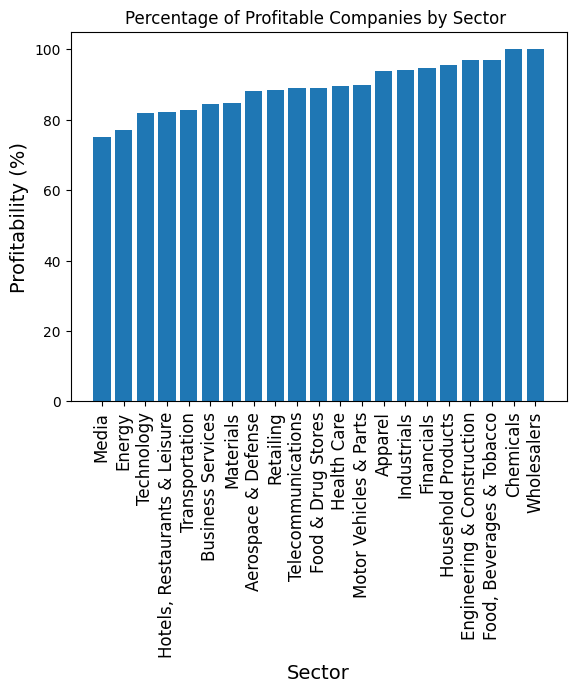

In [ ]:
plt.title('Percentage of Profitable Companies by Sector ')
plt.xlabel('Sector', fontsize=14)
plt.ylabel('Profitability (%)', fontsize=14)
plt.bar(sector_profitability_sorted['sector'], sector_profitability_sorted['profitability_percentage']);
plt.xticks(rotation=90, fontsize=12);

Based on this plot, we can see that the wholesales sector has the highest percentage of profitable companies.

## The first insight is that there is a difference between the sectors with the highest profit and the highest percentage of profitable companies. So the Telecommunication sector has the highest mean and median profit, but around 88 percent of the companies are profitable. On the other hand, even if the Wholesalers has the lowest mean and median profit, 100% of companies are profitable. This suggests that while the Telecommunications sector tends to generate higher profits , but a larger proportion of companies in Wholesalers manage to stay profitable, even if those profits are lower.

In [ ]:
profitability_by_gender = df.groupby('ceo_woman').agg(
    profitability_rate=('profit', 'mean')
).reset_index()
profitability_by_gender

,ceo_woman,profitability_rate
0,0,2046.320678
1,1,1807.949398


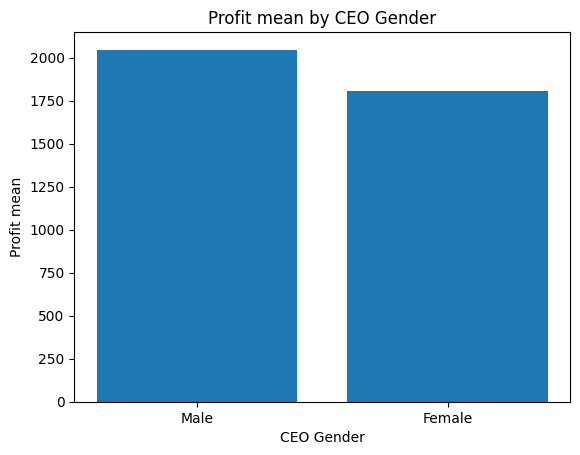

In [ ]:
plt.bar(profitability_by_gender['ceo_woman'], profitability_by_gender['profitability_rate']);
plt.xlabel('CEO Gender');
plt.ylabel('Profit mean');
plt.title('Profit mean by CEO Gender');
plt.xticks([0, 1], ['Male', 'Female']);

In [ ]:
profitability_by_gender = df.groupby('ceo_woman').agg(
    profitability_rate=('profitable', 'mean')
).reset_index()
profitability_by_gender

,ceo_woman,profitability_rate
0,0,0.881134
1,1,0.903614


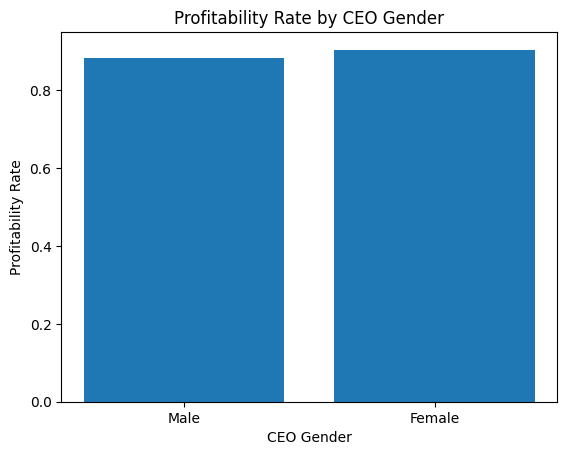

In [ ]:
plt.bar(profitability_by_gender['ceo_woman'], profitability_by_gender['profitability_rate']);
plt.xlabel('CEO Gender');
plt.ylabel('Profitability Rate');
plt.title('Profitability Rate by CEO Gender');
plt.xticks([0, 1], ['Male', 'Female']);

<ipython-input-30-54a1e338c07d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='ceo_woman', y='profit', data=df, palette='Blues');


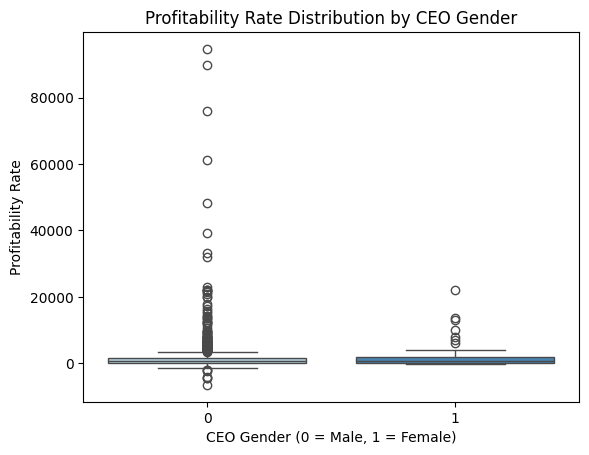

In [ ]:

sns.boxplot(x='ceo_woman', y='profit', data=df, palette='Blues');
plt.xlabel('CEO Gender (0 = Male, 1 = Female)');
plt.ylabel('Profitability Rate');
plt.title('Profitability Rate Distribution by CEO Gender');

In [ ]:
df['ceo_woman'].value_counts()

,count
ceo_woman,
0,917
1,83


## The second insight is that male CEOs tend to have higher average profits but more variation, with some very high results. Female CEOs are more consistent and do slightly better when comparing proportional profitability.

From the correlation matrix we cansee that high revenue tends to correlate with higher profit, but the relationship isn't perfect. Let's investigate companies with high revenue but low profit. What could be the cause?

In [ ]:
high_revenue_threshold = df['revenue'].quantile(0.75)
low_profit_threshold = df['profit'].quantile(0.25)

high_revenue_low_profit = df[(df['revenue'] >= high_revenue_threshold) &
                               (df['profit'] <= low_profit_threshold)]

In [ ]:
numeric_df_high_revenue_threshold = high_revenue_low_profit.select_dtypes(include=['int64', 'float64'])
numeric_df_high_revenue_threshold = numeric_df_high_revenue_threshold.drop(['newcomer'], axis=1)

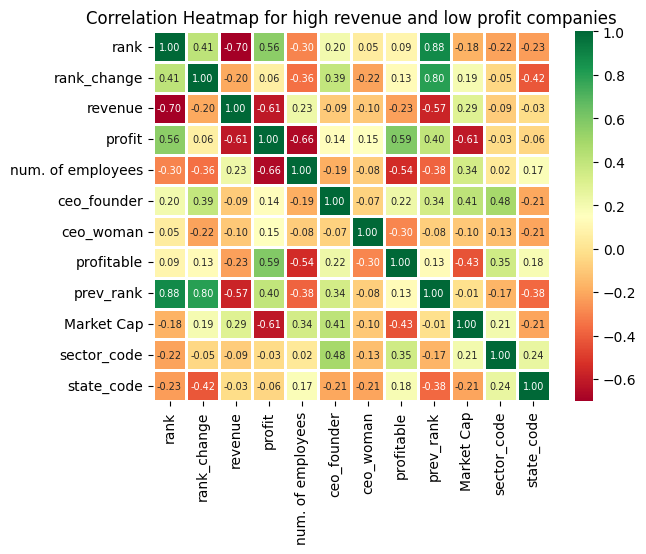

In [ ]:
sns.heatmap(
    numeric_df_high_revenue_threshold.corr(),
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    linewidths=1,
    cbar=True,
    annot_kws={"size": 7},
);
plt.title('Correlation Heatmap for high revenue and low profit companies');


We can see there is a strong negative correlation between the profit and number of employees. Let's investigate it further.

Text(0, 0.5, 'Profit')

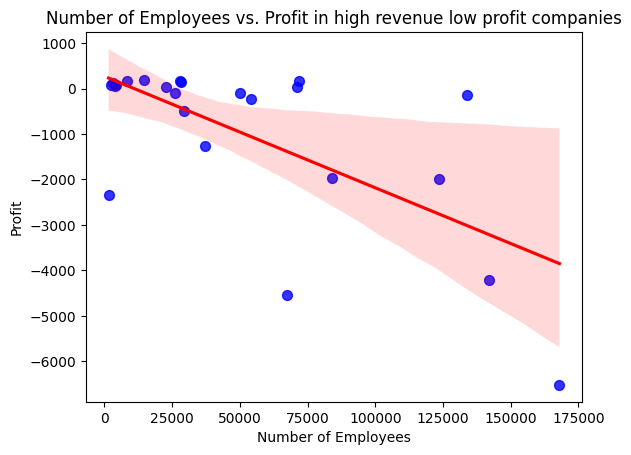

In [ ]:
sns.regplot(data=high_revenue_low_profit, x='num. of employees', y='profit', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Number of Employees vs. Profit in high revenue low profit companies')
plt.xlabel('Number of Employees')
plt.ylabel('Profit')

## The third insight is that in high revenue companies with lower profit, the high number of employees may be the reason.

Now that we investigated low proft hight revenue and saw what they did bad, now let's investigate high revenue high profit and learn from them.

In [ ]:
high_revenue_threshold = df['revenue'].quantile(0.95)
high_profit_threshold = df['profit'].quantile(0.95)

high_revenue_high_profit = df[(df['revenue'] >= high_revenue_threshold) &
                               (df['profit'] >= high_profit_threshold)]

In [ ]:
high_revenue_high_profit_numeric_df = high_revenue_high_profit.select_dtypes(include=['int64', 'float64'])
high_revenue_high_profit_numeric_df = high_revenue_high_profit_numeric_df.drop(columns=['newcomer', 'profitable'])

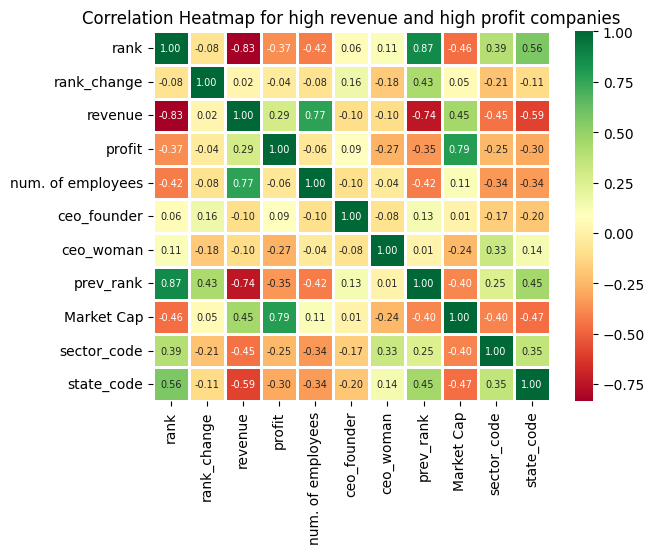

In [ ]:
sns.heatmap(
    high_revenue_high_profit_numeric_df.corr(),
    annot=True,
    cmap='RdYlGn',
    fmt=".2f",
    linewidths=1,
    cbar=True,
    annot_kws={"size": 7},
);
plt.title('Correlation Heatmap for high revenue and high profit companies');

We can see that the state and the sector plays a big role in the profit.

In [ ]:
high_revenue_high_profit = high_revenue_high_profit.sort_values(by='profit', ascending=False)

<ipython-input-40-5102d5587e65>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='state', y='profit', data=high_revenue_high_profit, palette='Set1');


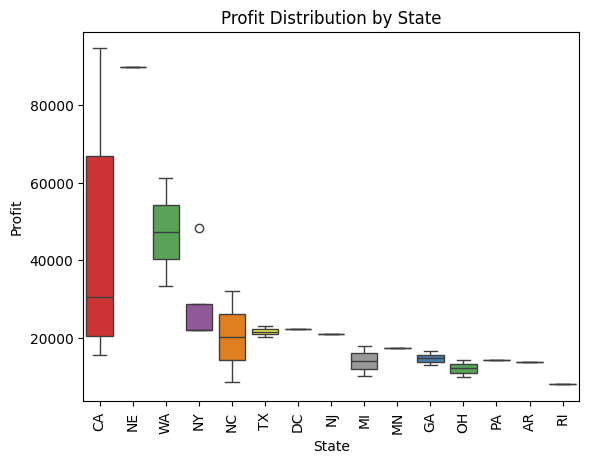

In [ ]:
sns.boxplot(x='state', y='profit', data=high_revenue_high_profit, palette='Set1');
plt.title('Profit Distribution by State');
plt.xlabel('State');
plt.ylabel('Profit');
plt.xticks(rotation=90);

As we can see the highest revenue, highest profit companies are in the state California

<ipython-input-41-ba3327a68297>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sector', y='profit', data=high_revenue_high_profit[high_revenue_high_profit['state'] == 'CA'], palette='Set2')


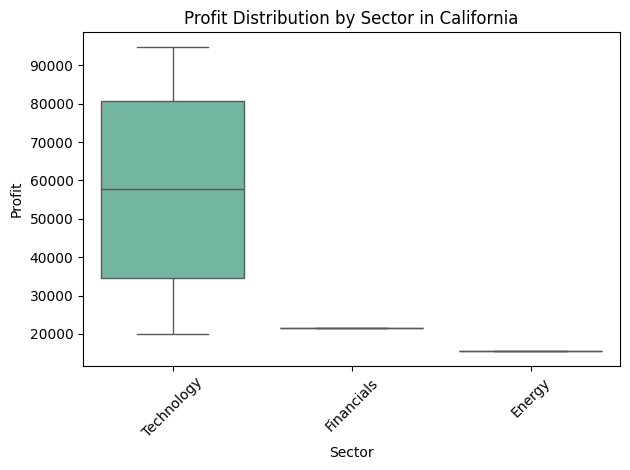

In [ ]:
sns.boxplot(x='sector', y='profit', data=high_revenue_high_profit[high_revenue_high_profit['state'] == 'CA'], palette='Set2')
plt.title('Profit Distribution by Sector in California')
plt.xlabel('Sector')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.tight_layout()

## The fourth insight is that California's technology sector is the dominant driver of high revenue and high profit, with tech companies leading the state in financial performance.

<ipython-input-42-91d8d9196af3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sector', y='profit', data=high_revenue_high_profit, palette='Set1');


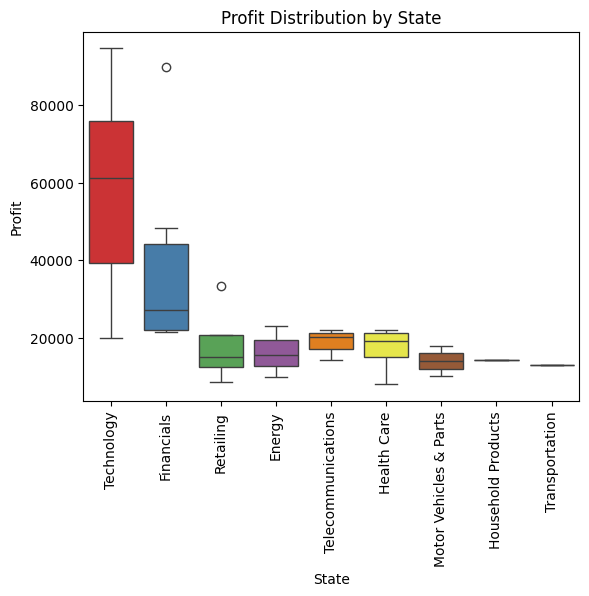

In [ ]:
sns.boxplot(x='sector', y='profit', data=high_revenue_high_profit, palette='Set1');
plt.title('Profit Distribution by State');
plt.xlabel('State');
plt.ylabel('Profit');
plt.xticks(rotation=90);

## The fifth insight is that Technoogy is the sector that dominates the high profit and high revenue companies. While the mean and median may not fully reflect the dominance of the technology sector, as not all tech companies are successful, the few that are generate enormous amounts of revenue and profit, distorting the overall data.